# Network Creation

Here we will be creating the different network images required for our analysis using the `NetworkX` and other python libraries.

Some crucial info about variable nomenclature – 
- `g/G` with any number is reserved for graph variables. 
<hr>

## Importing dependecies

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

<hr>

## Required Functions

In [6]:
# function to export .gexf file for gephi
def export(graph_var,name):
    if '.gexf.gz' in name: 
        nx.write_gexf(graph_var,name)
    else:
        print('enter a name with file type as `.gexf.gz`')
    

<hr>

## Creating a graph object

In [7]:
#randowm graph from the library
G = nx.barabasi_albert_graph(50,5)

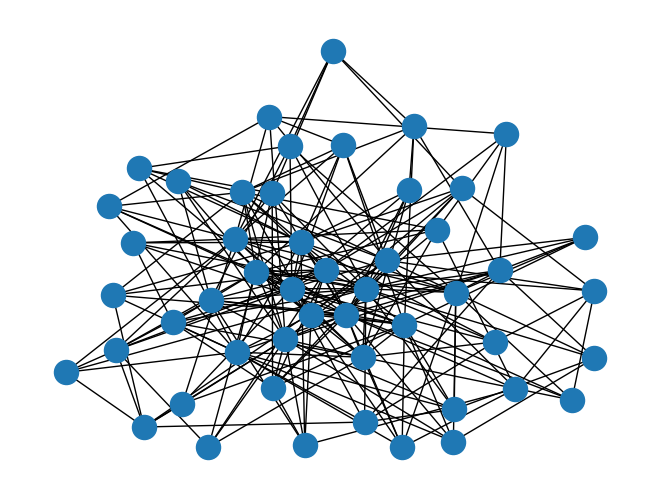

In [8]:
nx.draw_spring(G)

<hr>

## Importing data from Pandas

To create a network image from the source data, we need two list or two types of information. 
- **Edge list** : a list which has two columns `from` and `to` which specifies what node is connected to what node/s. The list will be having tuple elements.
- **Node list** : a list which has one column and has the names of all the nodes in the network and might contain other columns which have attribute data for each node in the network.

The name of the files we need for creating the network images are  <br>

FROM FIRST CRAWL - <br>
`1 -> April,2007`
| Folder Name   | Date     |
|--------------|-----------|
| 0403      | 03-04-2007   | 
| 0410      | 10-04-2007   |
| 0413      | 13-04-2007   | 
| 0418      | 18-04-2007   | 
| 0420      | 20-04-2007   |
| 0422      | 22-04-2007   | 
| 0424      | 24-04-2007   |
| 0426      | 26-04-2007   | 
| 0428      | 28-04-2007   |
| 0430      | 30-04-2007   |

`2 -> April,2008`
| Folder Name   | Date     |
|--------------|-----------|
| 080402      | 02-04-2008   | 
| 080404      | 04-04-2008   |
| 080406      | 06-04-2008   | 
| 080408      | 08-04-2008   | 
| 080412      | 12-04-2008   |
| 080414      | 14-04-2008   | 
| 080416      | 16-04-2008   |
| 080418      | 18-04-2008   | 
| 080422      | 22-04-2008   |
| 080424      | 24-04-2008   |
| 080426      | 26-04-2008   |
| 080428      | 28-04-2008   |
| 080430      | 30-04-2008   |

FROM UPDATED CRAWL - <br>
`3 -> April,2007`
| Folder Name   | Date     |
|--------------|-----------|
| 0402u      | 02-04-2007   | 
| 0409u      | 09-04-2007   |
| 0416u      | 16-04-2007   | 

`4 -> April,2008`
| Folder Name   | Date     | 
|--------------|-----------| 
| 080416u      | 16-04-2008   | 
| 080423u      | 23-04-2007   |
| 080430u      | 30-04-2007   | 

In [27]:
#import data from df here

#creating empty graph for our network
g1 = nx.DiGraph()

#adding edges from edge_list
g1.add_edges_from([(2,5),(1,3),(3,5)])

<hr>

## Merging multiple graphs - TEST

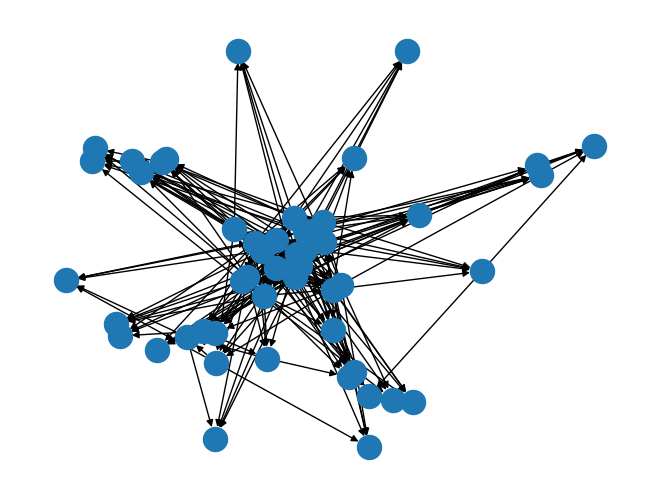

In [29]:
# mix the two graphs using the compose function
GM = nx.compose(g1, G)
nx.draw_spring(GM)

<hr>

## Performing basic metrices to understand our network image.

(array([22., 11.,  2.,  4.,  0.,  4.,  5.,  0.,  0.,  2.]),
 array([ 5. ,  6.8,  8.6, 10.4, 12.2, 14. , 15.8, 17.6, 19.4, 21.2, 23. ]),
 <BarContainer object of 10 artists>)

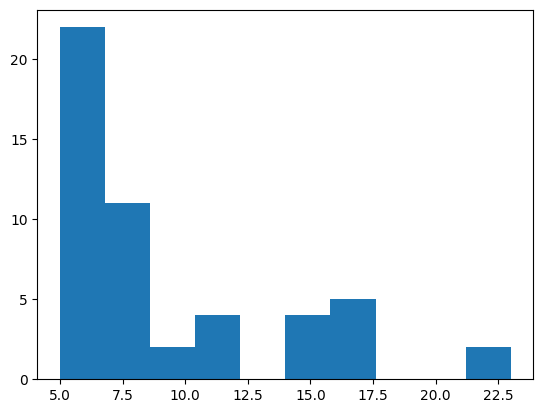

In [22]:
plt.hist([v for k,v in nx.degree(G)])

In [23]:
nx.info(G)

/var/folders/yq/sryk517930l66t3h_fdc8w040000gn/T/ipykernel_51037/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 50 nodes and 225 edges'

In [24]:
nx.diameter(G)

3

In [25]:
nx.cluster.average_clustering(G)

0.26517107799844375

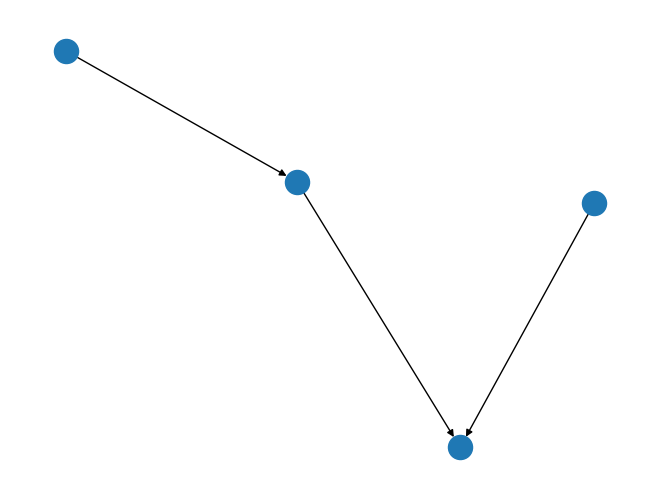

In [26]:
nx.draw_spring(g1)

<hr>

## Adding attributes to nodes - TEST

We need to use the `set_node_attributes` function of networkx to set the attributes of individual nodes.

If you provide a dictionary of dictionaries as the second argument, the outer dictionary is assumed to be keyed by node to an inner dictionary of node attributes for that node:

In [51]:
# dict of dict for attributes
attrs = {2: {"attr1": 20, "attr2": "nothing"},
         1: {"attr2": 3}} 

nx.set_node_attributes(g1, attrs)

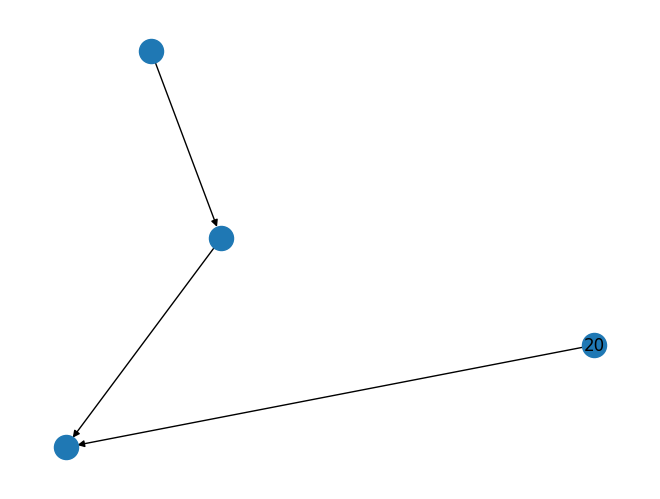

In [54]:
labels = nx.get_node_attributes(g1, 'attr1')

nx.draw_spring(g1, with_labels=True, labels=labels)

<hr>

## Exporting The Network Image

We can export our network image in `.gml` format to be used in other softwares like Gephi for visualisation or further analysis.

In [56]:
export(g1,'test.gexf.gz')